## Abstract

In this project, we will use the data set called SGEMM GPU Kernel Performance
Data set from UCI Machine Learning Repository to make the
predictions of the computer GPU run-time causes of different factors. The
goal of this project is to use Linear Regression as the base model to make
the predictions. Then, we will use the KNN (K-Nearest Neighbors) and
Neural Network as the comparisons.

## Data Description

The data is obtained from UCI Machine Learning Repository website.
You can find the data from the link here, Data Link: https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance. This data
contains 241600 rows and 18 columns. Fortunately, this data does not
have any missing values. To better describe the data, we have generated
the Table 1 to show the variable descriptions. The majority of the variables
are numerical variables and they are in integer types. All the categorical
variables such as STRM, STRN, SA, and SB have already been encoded in
a binary set {1, 0}. As the scope of this project, the target variables will
be the average Runtime of Run 1, Run 2, Run 3, and Run 4 (i.e. different
runtime for the GPU).
2

$\textrm{MWG} = \{16, 32, 64, 128\}$

$\textrm{NWG} = \{16, 32, 64, 128\}$

$\textrm{MWG} \times \textrm{NWG} = |\textrm{MWG}| * |\textrm{NWG}| = 4 \times 4 = 16$


## Methods

### Linear Regression
This model will be served as the base model for
the prediction. The idea is to try to fit our data using a linear line
that goes through the origin to make the data prediction. The goal
is to choose the coefficients such that the error between the predicted
values and true values can be minimized.

### KNN
This model will be served as one of the comparison models to
the linear regression. KNN model can be used in both classification
and regression problems. Our problem will be called a KNN regressor
(i.e. the regression problem). The idea is to choose the k nearest
neighbors and calculate their average value of them and set the value
of the new variable equal to the average. The k value (i.e. the number
of nearest neighbors) is the important parameter in KNN model. As
in linear regression, we will test different k values and choose the best
one to fit our data.

### Neural Network
This model will also be compared with the based
model, linear regression. We will perform the forward propagation and
we will use a multilayer neural network. The output for this model will
be calculated layer by layer.

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
from imblearn.over_sampling import SMOTE
from copy import copy
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import timeit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential

## Load Dataset

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Project Dataset(2).csv to Project Dataset(2).csv


In [ ]:
df = pd.read_csv("Project Dataset(2).csv")

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
df.shape

(241600, 18)

In [ ]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

### Find the average runtime

In [ ]:
# Average the runtime
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df1=df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)

In [ ]:
df1

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525


## Data Pre-Processing

### Missing Values

### Duplicate Values

In [ ]:
df1.isnull().sum().sort_values(ascending=False)

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

From the result gained above, there is no duplicated calues in the dataset.

### Check for duplicated columns

In [ ]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df1.shape[1]):
        # Select column at xth index.
        col = df1.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df1.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df1.columns.values[y])
    return list(duplicateColumnNames)

In [ ]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df1)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


From the code above, we also do not have any dupilcated columns.

### Data Removal

### Correlation Analysis

In [ ]:
df1['Runtime'].describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
Name: Runtime, dtype: float64

In [ ]:
df1

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525


### Outlier

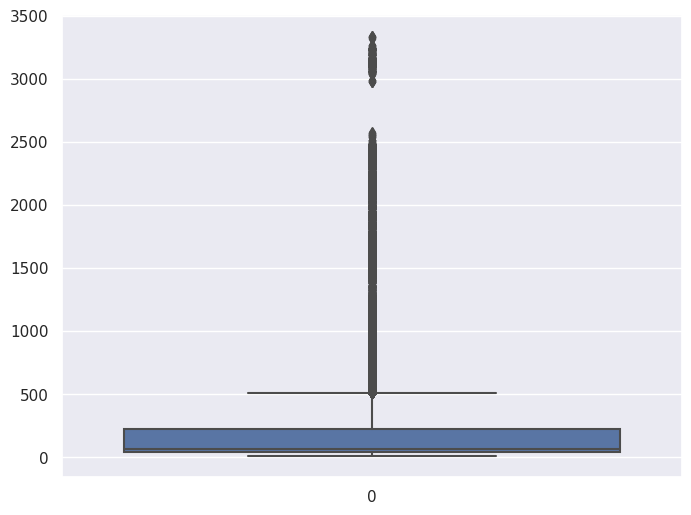

In [ ]:
#checking for outliers #查找异常值
plt.figure(figsize=(8,6))#设置画布大小
sns.boxplot(df1['Runtime']);
#箱形图可以展示上边缘，上四分位数，中位数，下四分位数，下边缘与异常值

In [ ]:
Q1=df1['Runtime'].quantile(0.25)
Q2=df1['Runtime'].quantile(0.75)
IQR = Q2 - Q1
LQ=Q1-1.5*IQR
UQ=Q2+1.5*IQR
df1 = df1[(df1.Runtime>LQ) & (df1.Runtime<UQ)]
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


Text(0.5, 1.0, 'Box Plot of Target after Removing Outliers')

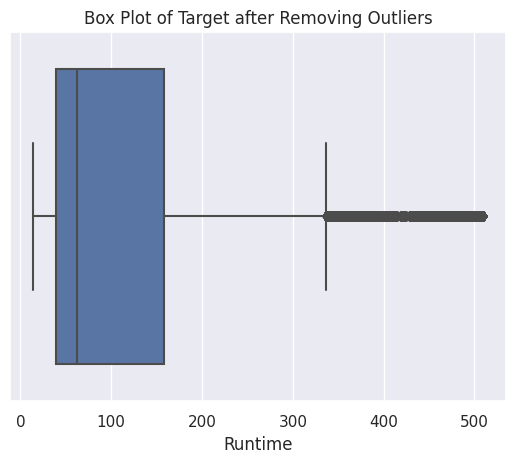

In [ ]:
plt.figure()
sns.boxplot(df1, x = df1['Runtime'])
plt.title('Box Plot of Target after Removing Outliers')

### Set Grading Criteria

In [ ]:
# get the maximum runtime
a = df1['Runtime'].max()
a

509.96250000000003

In [ ]:
# get the minimum runtime
b = df1['Runtime'].min()
b

13.317499999999999

In [ ]:
(a-b)/3

165.54833333333335

In [ ]:
df1['Label'] = pd.cut(x=df1['Runtime'], bins = [13, 165, 330, 510], labels = ['fast','medium','slow'])

<ipython-input-21-74a2d2d3f5fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label'] = pd.cut(x=df1['Runtime'], bins = [13, 165, 330, 510], labels = ['fast','medium','slow'])


In [ ]:
df1['Label'].nunique()

3

In [ ]:
df1['Label'].value_counts()

fast      163302
medium     39508
slow       12023
Name: Label, dtype: int64

## Data Visualization

As the majority of the data contains ordinal predictors other than Label, STRM, STRN, SA, and SB.

In [ ]:
df2 = df1.drop(['Label','STRM','STRN','SA','SB'],axis=1)
df2

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,Runtime
0,16,16,16,8,8,8,8,2,1,1,116.3700
1,16,16,16,8,8,8,8,2,1,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,80.5650
3,16,16,16,8,8,8,8,2,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,118.6625
...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,17.8175
241596,128,128,32,32,32,32,32,8,4,4,36.0350
241597,128,128,32,32,32,32,32,8,4,4,35.1600
241598,128,128,32,32,32,32,32,8,4,4,28.4525


### General Distribution

Text(0.5, 1.0, 'Count Plot for Classifying Runtime into Fast, Medium, and Slow')

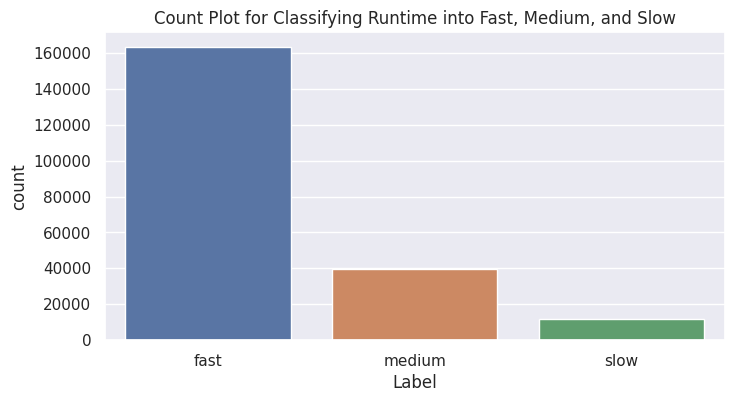

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(x=df1["Label"])
plt.title("Count Plot for Classifying Runtime into Fast, Medium, and Slow")

In [ ]:
df1['Label'].value_counts()

fast      163302
medium     39508
slow       12023
Name: Label, dtype: int64

### Heatmap

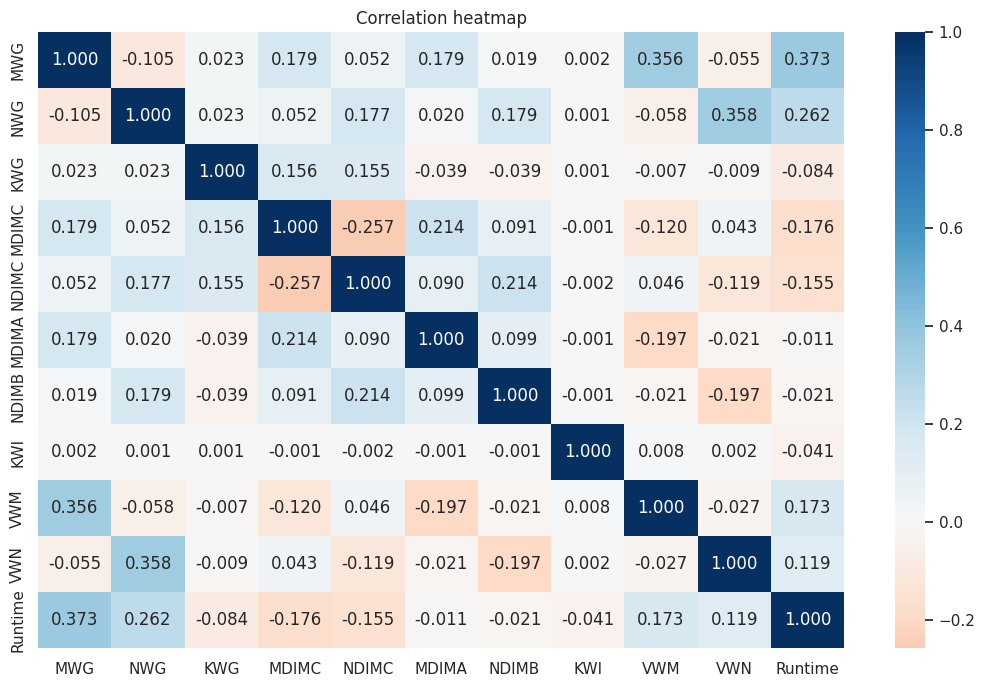

In [ ]:
## Let's Build the heatmap using seaborn
#Step 1: We need to find the correlation matrix for our data
corr_df2 = df2.corr() # we use 'corr()' function from pandas to find the correlation functio
# Use both matplotlib and seaborn to constructe our heatmap
fig, ax = plt.subplots()
fig.set_size_inches(13,8) # Give the size of our figure
sns.heatmap(corr_df2, annot=True, fmt='.3f',cmap='RdBu', center=0, ax=ax) #call we use the
ax.set_title('Correlation heatmap') # Set up the name of title
fig.show() # show the plot

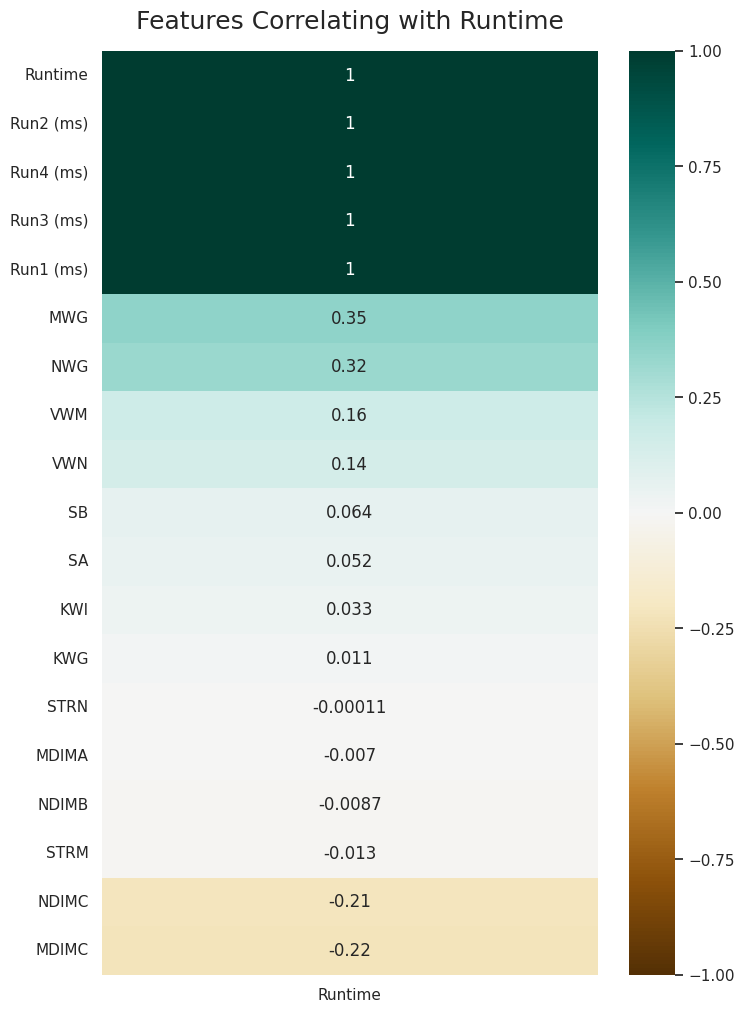

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Runtime']].sort_values(by='Runtime', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Runtime', fontdict={'fontsize':18}, pad=16);

### Checking Variable distribution

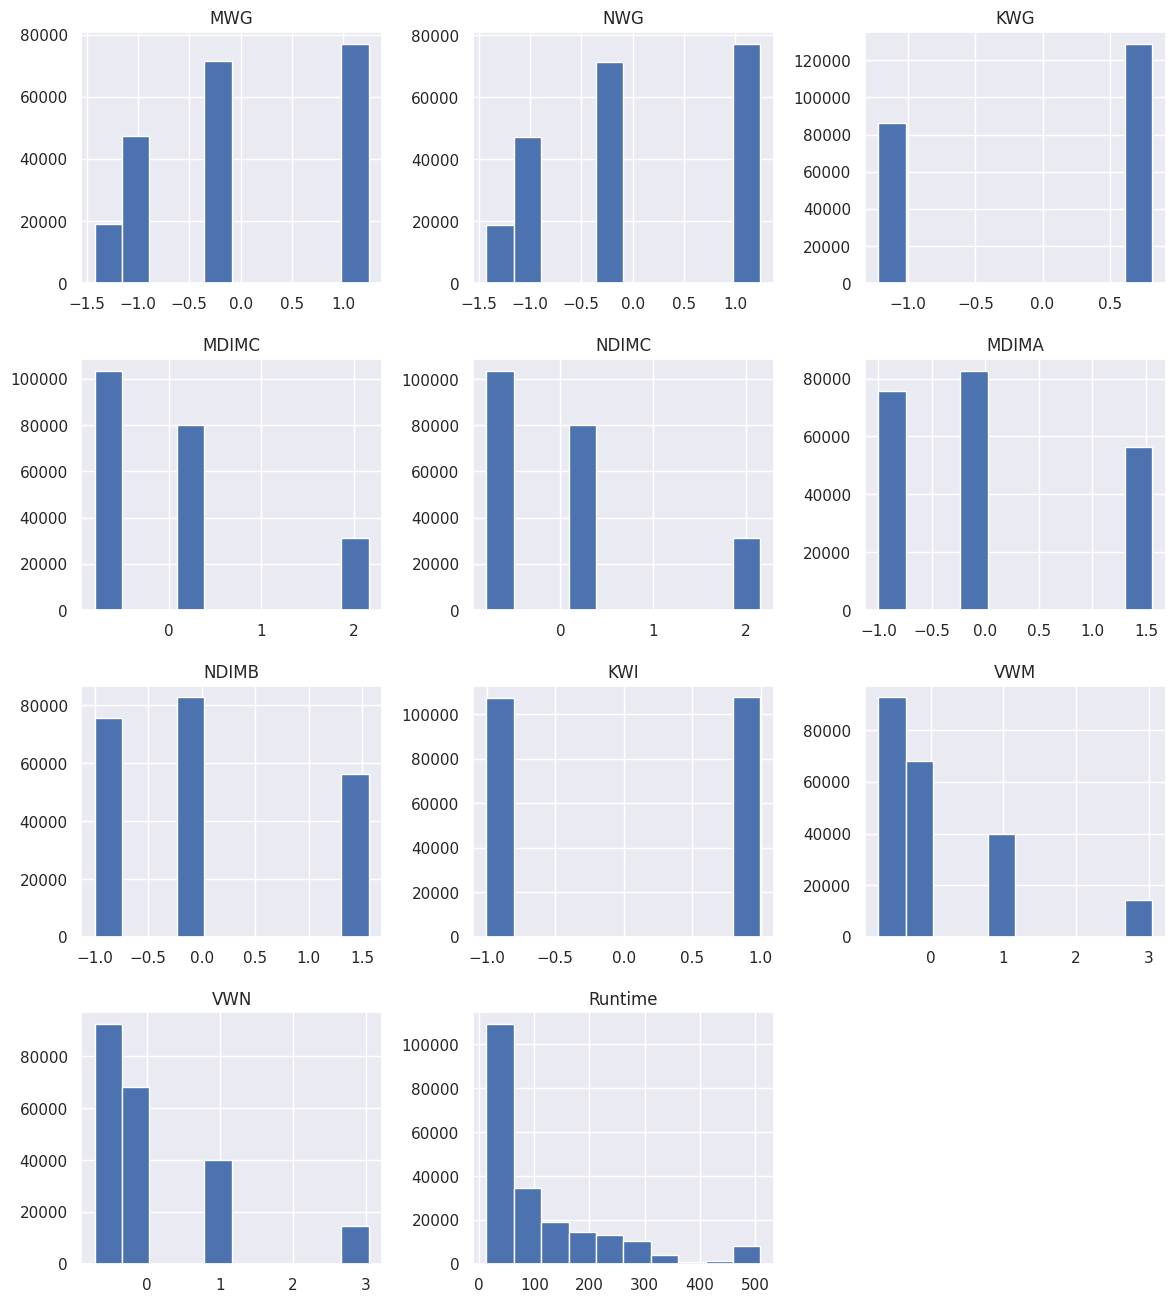

In [ ]:
#checking variable distribution
for index in range(10):
   df2.iloc[:,index] = (df2.iloc[:,index]-df2.iloc[:,index].mean()) / df2.iloc[:,index].std();
df2.hist(figsize= (14,16));

<ipython-input-30-920dd1aaca86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Runtime'])


Text(0.5, 1.0, 'Distribution Plot of Runtime')

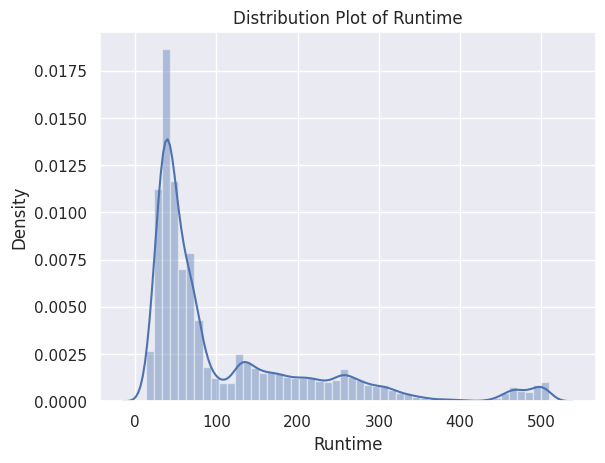

In [ ]:
#plotting the distribution of Runtime
sns.distplot(df2['Runtime'])
plt.title('Distribution Plot of Runtime')

In [ ]:
# Transform the distribution to normal distribution
from sklearn.preprocessing import QuantileTransformer
import numpy as np

In [ ]:
qt = QuantileTransformer(output_distribution='normal')
target = qt.fit_transform(np.array(df1['Runtime']).reshape(-1,1))

Text(0.5, 1.0, 'Distribution plot of tranformed Runtime value')

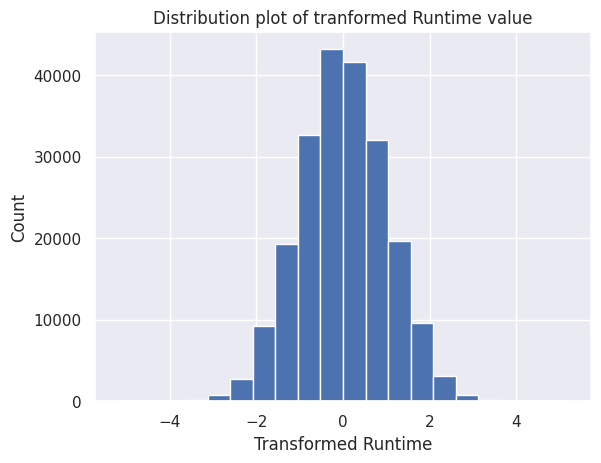

In [ ]:
plt.hist(target, bins=20)
plt.xlabel('Transformed Runtime')
plt.ylabel('Count')
plt.title("Distribution plot of tranformed Runtime value")

In [ ]:
df1['Target'] = qt.fit_transform(np.array(df1['Runtime']).reshape(-1,1))
df1.drop(['Runtime'], axis=1, inplace=True)
df1

<ipython-input-34-d39bab995cee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Target'] = qt.fit_transform(np.array(df1['Runtime']).reshape(-1,1))
<ipython-input-34-d39bab995cee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Runtime'], axis=1, inplace=True)


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Label,Target
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,fast,0.431656
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,fast,0.289393
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,fast,0.301574
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,fast,0.334320
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,fast,0.436023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,fast,-2.958301
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,fast,-0.885488
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,fast,-0.952107
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,fast,-1.489619


## Feature Selection

In [ ]:
## 可以做一下Anova和pearson， 实在不行就做对比， 两个比较为什么建议用另外一个

### Getting Dummies 

In [ ]:
variables = [ x for x in df1.columns if x not in ['Target','Label']]

In [ ]:
df1 = pd.get_dummies (df1 , columns = variables )

In [ ]:
df1

,Label,Target,MWG_16,MWG_32,MWG_64,MWG_128,NWG_16,NWG_32,NWG_64,NWG_128,...,VWN_4,VWN_8,STRM_0,STRM_1,STRN_0,STRN_1,SA_0,SA_1,SB_0,SB_1
0,fast,0.431656,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,fast,0.289393,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,fast,0.301574,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,fast,0.334320,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
4,fast,0.436023,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,fast,-2.958301,0,0,0,1,0,0,0,1,...,1,0,0,1,1,0,0,1,0,1
241596,fast,-0.885488,0,0,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
241597,fast,-0.952107,0,0,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
241598,fast,-1.489619,0,0,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

### f_regression

In [ ]:
Label = df1['Label']

In [ ]:
X = df1.drop(['Target','Label'], axis = 1)
y = df1['Target']

In [ ]:
y

0         0.431656
1         0.289393
2         0.301574
3         0.334320
4         0.436023
            ...   
241595   -2.958301
241596   -0.885488
241597   -0.952107
241598   -1.489619
241599   -2.958301
Name: Target, Length: 214833, dtype: float64

In [ ]:
select = SelectKBest(score_func = f_regression, k = 'all')
z = select.fit_transform(X,y)

In [ ]:
select.scores_

array([9.13728790e+01, 9.90234113e+03, 3.76796482e+03, 2.49361077e+04,
       5.83547034e+02, 1.58803064e+03, 3.37221770e+03, 6.02517247e+03,
       3.15108446e+01, 3.15108446e+01, 3.78284260e+03, 5.32702791e+02,
       3.04245973e+03, 5.07948771e+03, 1.08013199e+03, 3.05405618e+03,
       6.47675383e+02, 1.02363597e+02, 2.68873377e+02, 9.32283264e+02,
       8.38897775e+01, 5.27289976e+02, 3.30885621e+02, 3.30885621e+02,
       2.09075266e+00, 2.36863188e+03, 6.69773749e+01, 5.72971515e+03,
       8.68184572e+02, 1.13112258e+03, 2.93934130e+02, 9.58881888e+02,
       2.17595347e+03, 2.17595347e+03, 5.39019365e+01, 5.39019365e+01,
       1.66338615e+04, 1.66338615e+04, 5.45915119e+03, 5.45915119e+03])

In [ ]:
X.columns

Index(['MWG_16', 'MWG_32', 'MWG_64', 'MWG_128', 'NWG_16', 'NWG_32', 'NWG_64',
       'NWG_128', 'KWG_16', 'KWG_32', 'MDIMC_8', 'MDIMC_16', 'MDIMC_32',
       'NDIMC_8', 'NDIMC_16', 'NDIMC_32', 'MDIMA_8', 'MDIMA_16', 'MDIMA_32',
       'NDIMB_8', 'NDIMB_16', 'NDIMB_32', 'KWI_2', 'KWI_8', 'VWM_1', 'VWM_2',
       'VWM_4', 'VWM_8', 'VWN_1', 'VWN_2', 'VWN_4', 'VWN_8', 'STRM_0',
       'STRM_1', 'STRN_0', 'STRN_1', 'SA_0', 'SA_1', 'SB_0', 'SB_1'],
      dtype='object')

In [ ]:
featureScore = pd.DataFrame({'Feature':X.columns, 'Scores':select.scores_})

In [ ]:
featureScore

,Feature,Scores
0,MWG_16,91.372879
1,MWG_32,9902.341127
2,MWG_64,3767.964823
3,MWG_128,24936.107713
4,NWG_16,583.547034
5,NWG_32,1588.030642
6,NWG_64,3372.217702
7,NWG_128,6025.172472
8,KWG_16,31.510845
9,KWG_32,31.510845


In [ ]:
feature = featureScore.sort_values(by='Scores', ascending=False)
feature

,Feature,Scores
3,MWG_128,24936.107713
37,SA_1,16633.861466
36,SA_0,16633.861466
1,MWG_32,9902.341127
7,NWG_128,6025.172472
27,VWM_8,5729.715152
38,SB_0,5459.151188
39,SB_1,5459.151188
13,NDIMC_8,5079.487708
10,MDIMC_8,3782.842595


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'MWG_128'),
  Text(1, 0, 'SA_1'),
  Text(2, 0, 'SA_0'),
  Text(3, 0, 'MWG_32'),
  Text(4, 0, 'NWG_128'),
  Text(5, 0, 'VWM_8'),
  Text(6, 0, 'SB_0'),
  Text(7, 0, 'SB_1'),
  Text(8, 0, 'NDIMC_8'),
  Text(9, 0, 'MDIMC_8'),
  Text(10, 0, 'MWG_64'),
  Text(11, 0, 'NWG_64'),
  Text(12, 0, 'NDIMC_32'),
  Text(13, 0, 'MDIMC_32'),
  Text(14, 0, 'VWM_2'),
  Text(15, 0, 'STRM_0'),
  Text(16, 0, 'STRM_1'),
  Text(17, 0, 'NWG_32'),
  Text(18, 0, 'VWN_2'),
  Text(19, 0, 'NDIMC_16'),
  Text(20, 0, 'VWN_8'),
  Text(21, 0, 'NDIMB_8'),
  Text(22, 0, 'VWN_1'),
  Text(23, 0, 'MDIMA_8'),
  Text(24, 0, 'NWG_16'),
  Text(25, 0, 'MDIMC_16'),
  Text(26, 0, 'NDIMB_32'),
  Text(27, 0, 'KWI_8'),
  Text(28, 0, 'KWI_2'),
  Text(29, 0, 'VWN_4'),
  Text(30, 0, 'MDIMA_32'),
  Text(31, 0, 'MDIMA_16'),
  Text(32, 0, 'MWG_1

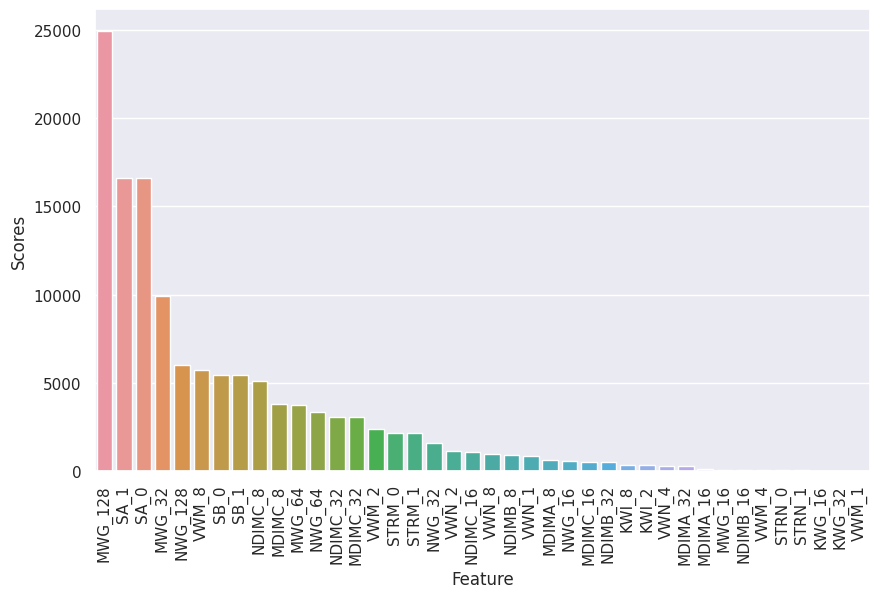

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x='Feature', y='Scores', data=feature)
plt.xticks(rotation=90)

# f_classif

In [ ]:
 from sklearn.feature_selection import f_classif

In [ ]:
print(X)

        MWG_16  MWG_32  MWG_64  MWG_128  NWG_16  NWG_32  NWG_64  NWG_128  \
0            1       0       0        0       1       0       0        0   
1            1       0       0        0       1       0       0        0   
2            1       0       0        0       1       0       0        0   
3            1       0       0        0       1       0       0        0   
4            1       0       0        0       1       0       0        0   
...        ...     ...     ...      ...     ...     ...     ...      ...   
241595       0       0       0        1       0       0       0        1   
241596       0       0       0        1       0       0       0        1   
241597       0       0       0        1       0       0       0        1   
241598       0       0       0        1       0       0       0        1   
241599       0       0       0        1       0       0       0        1   

        KWG_16  KWG_32  ...  VWN_4  VWN_8  STRM_0  STRM_1  STRN_0  STRN_1  \
0         

In [ ]:
y = df1['Target']
print(y)

0         0.431656
1         0.289393
2         0.301574
3         0.334320
4         0.436023
            ...   
241595   -2.958301
241596   -0.885488
241597   -0.952107
241598   -1.489619
241599   -2.958301
Name: Target, Length: 214833, dtype: float64


In [ ]:
select = SelectKBest(score_func = f_classif, k = 'all')
z = select.fit_transform(X,y)

In [ ]:
select.scores_

array([1.023114  , 0.86790115, 1.0664512 , 1.6701798 , 1.3582937 ,
       0.9429561 , 1.0627351 , 1.408196  , 1.1270987 , 1.1273574 ,
       1.1200165 , 1.0387874 , 0.86039406, 1.1232876 , 1.0396872 ,
       0.9434013 , 1.0460029 , 1.0017304 , 1.0237869 , 1.058524  ,
       1.0035422 , 1.0172427 , 1.0561658 , 1.0562601 , 1.161056  ,
       1.0433396 , 1.2013494 , 1.8204978 , 1.2527905 , 1.0238168 ,
       1.193177  , 1.4182988 , 1.1047314 , 1.10457   , 1.0243169 ,
       1.0242945 , 1.3336618 , 1.3336289 , 1.1297259 , 1.1298009 ],
      dtype=float32)

In [ ]:
X.columns

Index(['MWG_16', 'MWG_32', 'MWG_64', 'MWG_128', 'NWG_16', 'NWG_32', 'NWG_64',
       'NWG_128', 'KWG_16', 'KWG_32', 'MDIMC_8', 'MDIMC_16', 'MDIMC_32',
       'NDIMC_8', 'NDIMC_16', 'NDIMC_32', 'MDIMA_8', 'MDIMA_16', 'MDIMA_32',
       'NDIMB_8', 'NDIMB_16', 'NDIMB_32', 'KWI_2', 'KWI_8', 'VWM_1', 'VWM_2',
       'VWM_4', 'VWM_8', 'VWN_1', 'VWN_2', 'VWN_4', 'VWN_8', 'STRM_0',
       'STRM_1', 'STRN_0', 'STRN_1', 'SA_0', 'SA_1', 'SB_0', 'SB_1'],
      dtype='object')

In [ ]:
featureScore = pd.DataFrame({'Feature':X.columns, 'Scores':select.scores_})

In [ ]:
featureScore

,Feature,Scores
0,MWG_16,1.023114
1,MWG_32,0.867901
2,MWG_64,1.066451
3,MWG_128,1.670180
4,NWG_16,1.358294
5,NWG_32,0.942956
6,NWG_64,1.062735
7,NWG_128,1.408196
8,KWG_16,1.127099
9,KWG_32,1.127357


In [ ]:
feature = featureScore.sort_values(by='Scores', ascending=False)
feature

,Feature,Scores
27,VWM_8,1.820498
3,MWG_128,1.670180
31,VWN_8,1.418299
7,NWG_128,1.408196
4,NWG_16,1.358294
36,SA_0,1.333662
37,SA_1,1.333629
28,VWN_1,1.252790
26,VWM_4,1.201349
30,VWN_4,1.193177


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'VWM_8'),
  Text(1, 0, 'MWG_128'),
  Text(2, 0, 'VWN_8'),
  Text(3, 0, 'NWG_128'),
  Text(4, 0, 'NWG_16'),
  Text(5, 0, 'SA_0'),
  Text(6, 0, 'SA_1'),
  Text(7, 0, 'VWN_1'),
  Text(8, 0, 'VWM_4'),
  Text(9, 0, 'VWN_4'),
  Text(10, 0, 'VWM_1'),
  Text(11, 0, 'SB_1'),
  Text(12, 0, 'SB_0'),
  Text(13, 0, 'KWG_32'),
  Text(14, 0, 'KWG_16'),
  Text(15, 0, 'NDIMC_8'),
  Text(16, 0, 'MDIMC_8'),
  Text(17, 0, 'STRM_0'),
  Text(18, 0, 'STRM_1'),
  Text(19, 0, 'MWG_64'),
  Text(20, 0, 'NWG_64'),
  Text(21, 0, 'NDIMB_8'),
  Text(22, 0, 'KWI_8'),
  Text(23, 0, 'KWI_2'),
  Text(24, 0, 'MDIMA_8'),
  Text(25, 0, 'VWM_2'),
  Text(26, 0, 'NDIMC_16'),
  Text(27, 0, 'MDIMC_16'),
  Text(28, 0, 'STRN_0'),
  Text(29, 0, 'STRN_1'),
  Text(30, 0, 'VWN_2'),
  Text(31, 0, 'MDIMA_32'),
  Text(32, 0, 'MWG_16'),
  Tex

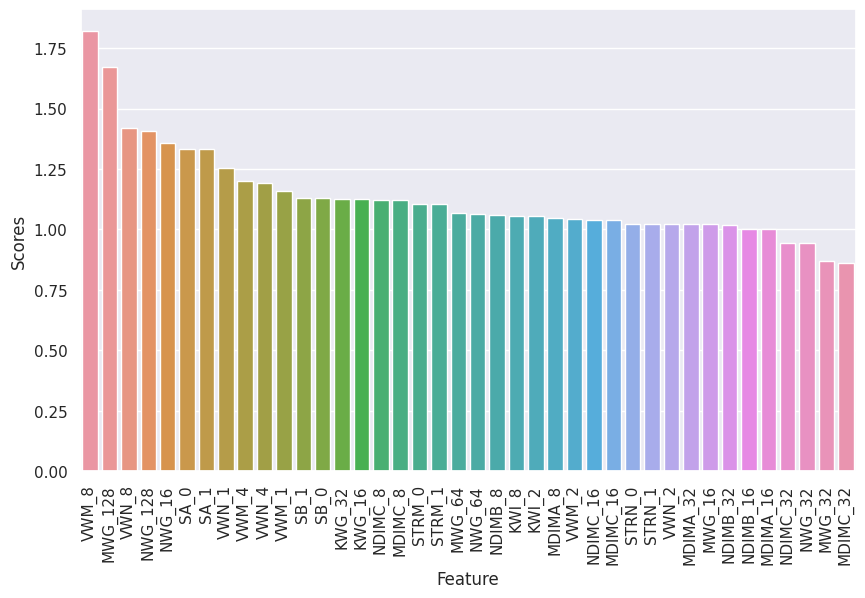

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x='Feature', y='Scores', data=feature)
plt.xticks(rotation=90)

In [ ]:
select = SelectKBest(score_func = f_regression, k = 11)
z = select.fit_transform(X,y)

In [ ]:
filter = select.get_support()
features = X.columns

print("Selected best 8:")
print(features[filter])
print(z) 

Selected best 8:
Index(['MWG_32', 'MWG_64', 'MWG_128', 'NWG_128', 'MDIMC_8', 'NDIMC_8', 'VWM_8',
       'SA_0', 'SA_1', 'SB_0', 'SB_1'],
      dtype='object')
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 1 1 0]
 [0 0 1 ... 1 0 1]]


In [ ]:
z.shape

(214833, 11)

In [ ]:
df2 = pd.DataFrame(z)
df2

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,1,1,0,1,0,1,0
1,0,0,0,0,1,1,0,1,0,0,1
2,0,0,0,0,1,1,0,0,1,1,0
3,0,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
214828,0,0,1,1,0,0,0,0,1,0,1
214829,0,0,1,1,0,0,0,1,0,1,0
214830,0,0,1,1,0,0,0,1,0,0,1
214831,0,0,1,1,0,0,0,0,1,1,0


In [ ]:
df2.columns = features[filter]
df2

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1
0,0,0,0,0,1,1,0,1,0,1,0
1,0,0,0,0,1,1,0,1,0,0,1
2,0,0,0,0,1,1,0,0,1,1,0
3,0,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
214828,0,0,1,1,0,0,0,0,1,0,1
214829,0,0,1,1,0,0,0,1,0,1,0
214830,0,0,1,1,0,0,0,1,0,0,1
214831,0,0,1,1,0,0,0,0,1,1,0


In [ ]:
df2.isnull().sum()

MWG_32     0
MWG_64     0
MWG_128    0
NWG_128    0
MDIMC_8    0
NDIMC_8    0
VWM_8      0
SA_0       0
SA_1       0
SB_0       0
SB_1       0
dtype: int64

In [ ]:
df2.shape

(214833, 11)

In [ ]:
df3 = pd.concat([df2, y,Label], axis=1)
df3

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1,Target,Label
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.444207,fast
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.303247,fast
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.318379,fast
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.351412,fast
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.451467,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.895344,fast
241596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.875669,fast
241597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.941982,fast
241598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.508617,fast


In [ ]:
df3.isnull().sum()

MWG_32     16836
MWG_64     16836
MWG_128    16836
NWG_128    16836
MDIMC_8    16836
NDIMC_8    16836
VWM_8      16836
SA_0       16836
SA_1       16836
SB_0       16836
SB_1       16836
Target     16836
Label      16836
dtype: int64

In [ ]:
df4 = df3.dropna(axis = 0)
df4

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1,Target,Label
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.444207,fast
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.303247,fast
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.318379,fast
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.351412,fast
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.451467,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214828,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.496551,medium
214829,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.156561,medium
214830,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.217760,medium
214831,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.483904,fast


In [ ]:
df4.isnull().sum()

MWG_32     0
MWG_64     0
MWG_128    0
NWG_128    0
MDIMC_8    0
NDIMC_8    0
VWM_8      0
SA_0       0
SA_1       0
SB_0       0
SB_1       0
Target     0
Label      0
dtype: int64

In [ ]:
df4['Label'].value_counts()

fast      155911
medium     32352
slow        9734
Name: Label, dtype: int64

Text(0.5, 1.0, 'Count Plot for Classifying Runtime into Fast, Medium, and Slow')

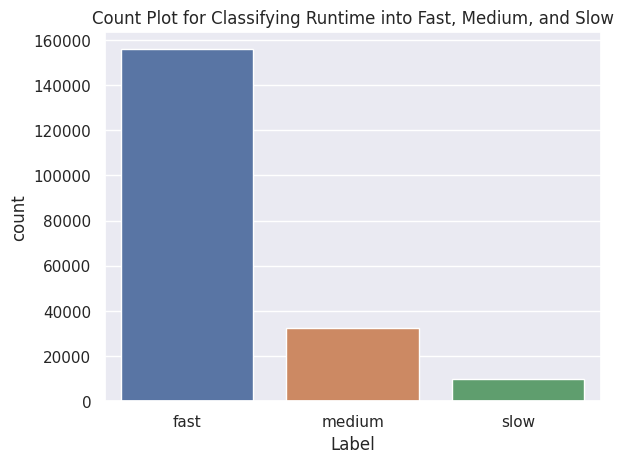

In [ ]:
sns.countplot(x=df4["Label"])
plt.title("Count Plot for Classifying Runtime into Fast, Medium, and Slow")

<ipython-input-63-9a5ada800f93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df3.corr()[['Target']].sort_values(by='Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


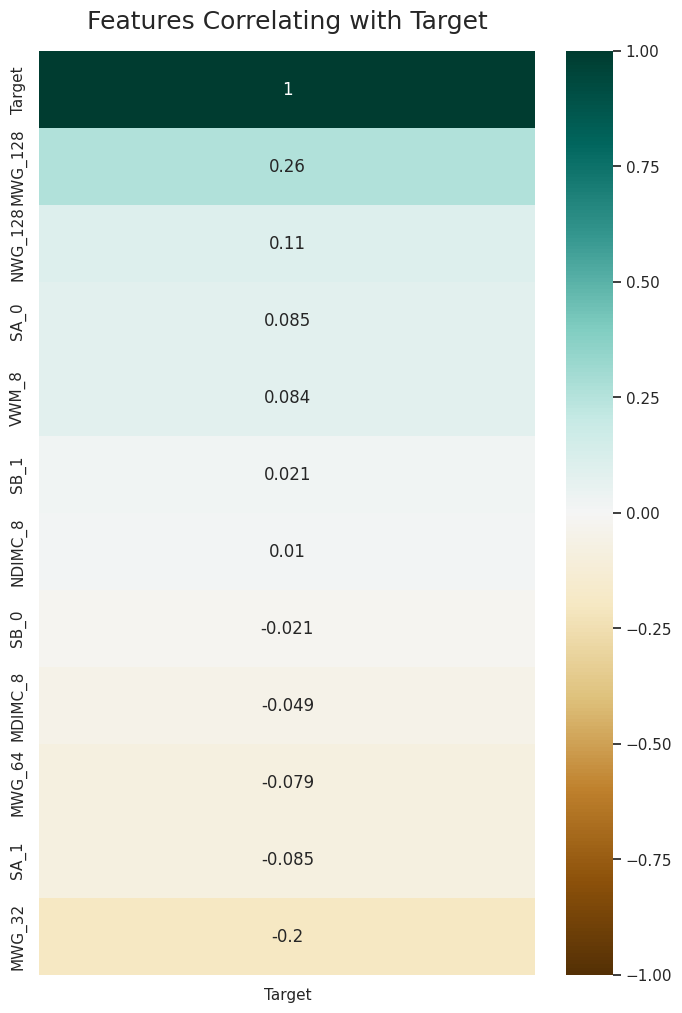

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df3.corr()[['Target']].sort_values(by='Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16);

## Oversample(Trade off)

From the graph of correlation frequency, we know that most data are uncorrelated but there are also a few of them correlated. Besides, it also tells us that data is kind of imbalance. So we need to do dimension reduction and decide to use SMOTE to correct unbalanced data.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y = df4['Label']
y

0           fast
1           fast
2           fast
3           fast
4           fast
           ...  
214828    medium
214829    medium
214830    medium
214831      fast
214832    medium
Name: Label, Length: 197997, dtype: category
Categories (3, object): ['fast' < 'medium' < 'slow']

In [ ]:
X = df4.iloc[:,:-1]
X

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1,Target
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.444207
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.303247
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.318379
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.351412
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.451467
...,...,...,...,...,...,...,...,...,...,...,...,...
214828,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.496551
214829,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.156561
214830,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.217760
214831,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.483904


In [ ]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)
df4['Label'].value_counts()

fast      155911
medium     32352
slow        9734
Name: Label, dtype: int64

## Model Choosing 

* Linear Regression (Base Line Model)
  * Reguler GD
  * Regularized
* KNN
* Neural Network

## Model Fitting

In [ ]:
X = df4.drop(['Target','Label'], axis=1)
X

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
214828,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
214829,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
214830,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
214831,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
y = df4[['Target','Label']]
y

,Target,Label
0,0.444207,fast
1,0.303247,fast
2,0.318379,fast
3,0.351412,fast
4,0.451467,fast
...,...,...
214828,1.496551,medium
214829,1.156561,medium
214830,1.217760,medium
214831,0.483904,fast


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                                                test_size = 0.30, random_state = 0 )

In [ ]:
sample = copy(df4)
sample['Target'] = df4['Target']
sample['Label'] = df4['Label']
sample = sample.groupby('Label').sample(100, random_state=1)
sample

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1,Target,Label
28847,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.701584,fast
121771,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,-2.697621,fast
129966,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.895259,fast
179441,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.121657,fast
76086,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.070388,fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207880,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.156569,slow
125740,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.832696,slow
171169,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.871210,slow
111646,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.928602,slow


In [ ]:
X_sample = sample.drop(['Target','Label'], axis=1)
X_sample

,MWG_32,MWG_64,MWG_128,NWG_128,MDIMC_8,NDIMC_8,VWM_8,SA_0,SA_1,SB_0,SB_1
28847,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
121771,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
129966,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
179441,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
76086,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
207880,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
125740,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
171169,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
111646,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
y_sample = sample[['Target','Label']]

In [ ]:
y_sample

,Target,Label
28847,-0.701584,fast
121771,-2.697621,fast
129966,-1.895259,fast
179441,0.121657,fast
76086,-1.070388,fast
...,...,...
207880,2.156569,slow
125740,1.832696,slow
171169,1.871210,slow
111646,1.928602,slow


In [ ]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, 
                                                                                y_sample, 
                                                                                test_size = 0.30, random_state = 0 )

## Linear Regression

In [ ]:
class LinearRegression:

    def __init__(self, learningRate, maxIteration):

        self.maxIteration = maxIteration
        self.learningRate = learningRate

    def predict(self, X):
        return X.dot(self.w) + self.b
    
    def gradientDescent(self):
        
        y_hat = self.predict(self.X)

        dw = - (2 * (self.X.T ).dot(self.y - y_hat )) / self.m
        db = - 2 * np.sum(self.y - y_hat) / self.m

        self.w = self.w - self.learningRate * dw
        self.b = self.b - self.learningRate * db

        return self
    
    def fit(self, X, y):
        
        self.m = X.shape[0]
        self.w = np.ones(X.shape[1], dtype=np.float64) * 0
        self.b = 0
        self.X = X
        self.y = y

        for i in tqdm(range(self.maxIteration)):
          self.gradientDescent()

In [ ]:
error_rate = []
error_rate_train = []
for i in range(100,3000,500):
  lr = LinearRegression(maxIteration = i, learningRate = 0.01)
  lr.fit(X_train, y_train['Target'])
  error_rate.append(mean_squared_error(y_test['Target'], lr.predict(X_test)))
  error_rate_train.append(mean_squared_error(y_train['Target'], lr.predict(X_train)))

100%|██████████| 2600/2600 [00:16<00:00, 152.95it/s]


Text(0, 0.5, 'Error Rate')

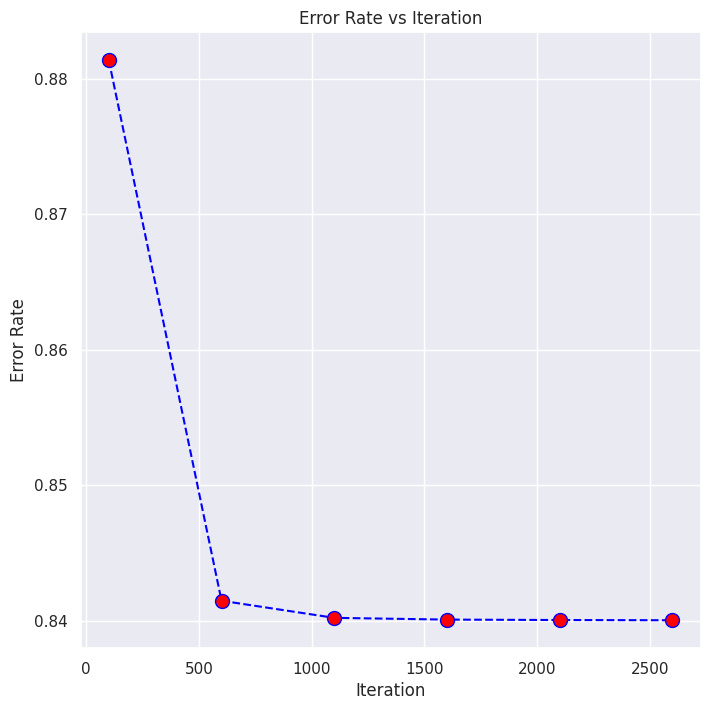

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(100,3000,500), error_rate, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error Rate')

In [ ]:
error_rate = []
error_rate_train = []
for i in range(1,10,2):
  lr = LinearRegression(maxIteration = 2500, learningRate = i*0.01)
  lr.fit(X_train, y_train['Target'])
  error_rate.append(mean_squared_error(y_test['Target'], lr.predict(X_test)))
  error_rate_train.append(mean_squared_error(y_train['Target'], lr.predict(X_train)))

100%|██████████| 2500/2500 [00:16<00:00, 149.86it/s]


Text(0, 0.5, 'Error Rate')

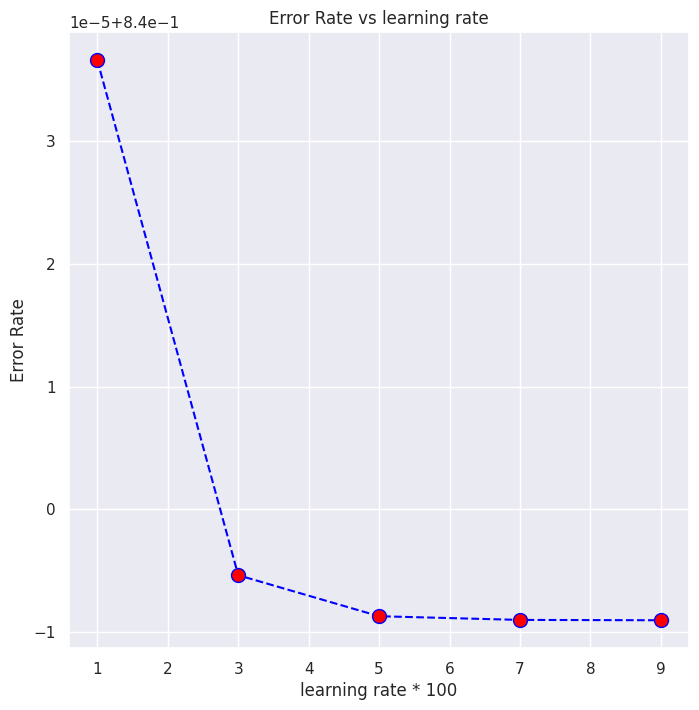

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(1,10,2), error_rate, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs learning rate')
plt.xlabel('learning rate * 100')
plt.ylabel('Error Rate')

In [ ]:
lr = LinearRegression(maxIteration = 1500, learningRate = 0.07)
start_time = timeit.default_timer()
lr.fit(X_train, y_train['Target'])
print('Training Time: ', timeit.default_timer() - start_time)
print('RMSE', np.sqrt(mean_squared_error(lr.predict(X_test),y_test['Target'])))
print('MAE', mean_absolute_error(lr.predict(X_test),y_test['Target']))

100%|██████████| 1500/1500 [00:11<00:00, 134.83it/s]

Training Time:  11.132405402000018
RMSE 0.9165106648823557
MAE 0.7256295646236808


## KNN

In [ ]:
def distNeighbours(X_train,y_train,X_test,K):

  distance=[]
  for i in range(len(X_train)):
    d=0
      
    for j in range(len(X_train.columns)):   
        d+=round(np.sqrt((X_train.iloc[i,j]-X_test[j])**2),2)
          
    distance.append((d,y_train.iloc[i]))
    distance=sorted(distance, key=lambda x: x[0])[0:K]
  return distance

def predictOutputNumeric(X_train,y_train,X_test,K):
  neighbours=[]
  result=[]
  for i in range(len(X_test)):
    neighbours.append(distNeighbours(X_train,y_train,X_test.iloc[i,:],K))
  for i in neighbours:
    mean=0
    for j in i:
      mean+=j[-1]
    mean=mean/K
    result.append(mean)
  return result

In [ ]:
error_rate = []
error_rate_train = []
for i in range(3,30,10):
  o = predictOutputNumeric(X_train_sample,y_train_sample['Target'],X_test_sample,i)
  o_train = predictOutputNumeric(X_train_sample,y_train_sample['Target'],X_train_sample,i)
  error_rate.append(mean_squared_error(y_test_sample['Target'], o))
  error_rate_train.append(mean_squared_error(y_train_sample['Target'], o_train))

Text(0, 0.5, 'Error Rate')

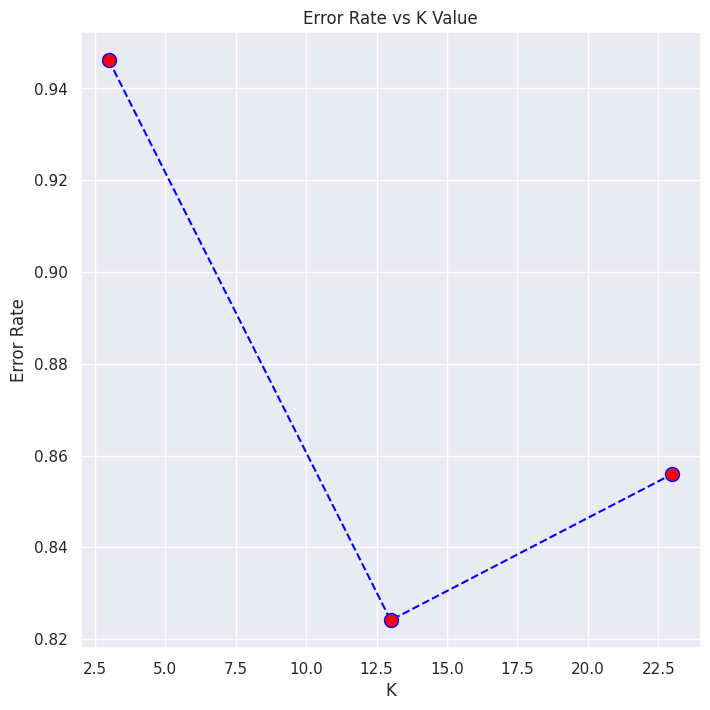

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(3,30,10), error_rate, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
start_time = timeit.default_timer()
knn=predictOutputNumeric(X_train_sample,y_train_sample['Target'],X_test_sample,13)
print('Training Time: ', timeit.default_timer() - start_time)
print('RMSE', np.sqrt(mean_squared_error(y_test_sample['Target'], knn)))
print('MAE', mean_absolute_error(y_test_sample['Target'], knn))

Training Time:  9.070505247000028
RMSE 0.9078081209781994
MAE 0.6805080346405192


## Neural Network

In [ ]:
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import Model
from collections import Counter

In [ ]:
nn = Sequential()
nn.add(Dense(128, input_shape=(11,), activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(1, activation='relu'))

nn.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
error_rate = []
error_rate_train = []
for i in range(100,300,50):
  nn.fit(X_train_sample, y_train_sample['Target'], epochs=i, batch_size=20, verbose=0, validation_split=0.3)
  error_rate.append(mean_squared_error(y_test_sample['Target'], nn.predict(X_test_sample)))
  error_rate_train.append(mean_squared_error(y_train_sample['Target'], nn.predict( X_train_sample)))

7/7 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Error Rate')

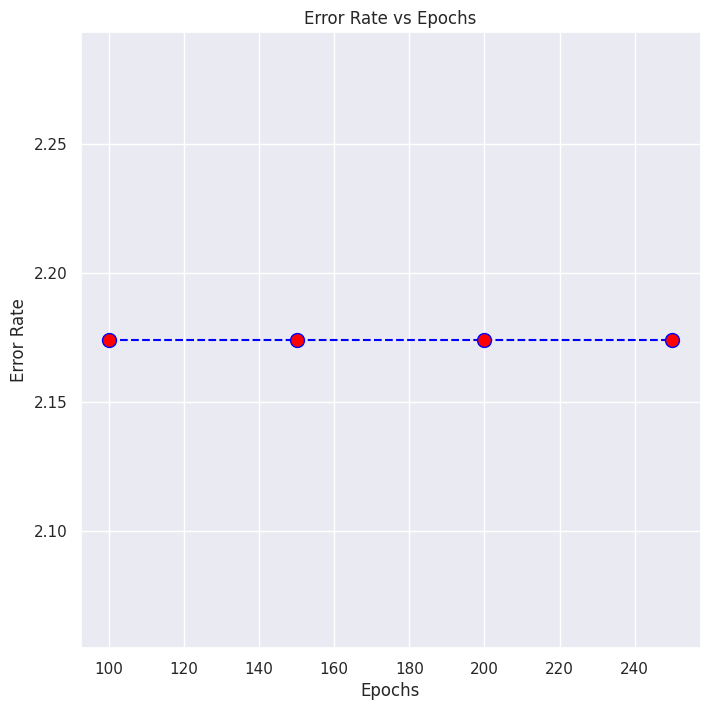

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(100,300,50), error_rate, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')

In [ ]:
start_time = timeit.default_timer()
nn.fit(X_train, y_train['Target'], epochs=100, batch_size=20, verbose=2, validation_split=0.2)
print('Training Time: ', timeit.default_timer() - start_time)
print('RMSE', np.sqrt(mean_squared_error(y_test['Target'], nn.predict(X_test))))
print('MAE', mean_absolute_error(y_test['Target'], nn.predict(X_test)))

Epoch 1/100
5544/5544 - 15s - loss: 0.7698 - mean_squared_error: 0.9483 - val_loss: 0.7685 - val_mean_squared_error: 0.9439 - 15s/epoch - 3ms/step
Epoch 2/100
5544/5544 - 13s - loss: 0.7698 - mean_squared_error: 0.9483 - val_loss: 0.7685 - val_mean_squared_error: 0.9439 - 13s/epoch - 2ms/step
Epoch 3/100
5544/5544 - 13s - loss: 0.7698 - mean_squared_error: 0.9483 - val_loss: 0.7685 - val_mean_squared_error: 0.9439 - 13s/epoch - 2ms/step
Epoch 4/100
5544/5544 - 13s - loss: 0.7698 - mean_squared_error: 0.9483 - val_loss: 0.7685 - val_mean_squared_error: 0.9439 - 13s/epoch - 2ms/step
Epoch 5/100
5544/5544 - 13s - loss: 0.7698 - mean_squared_error: 0.9483 - val_loss: 0.7685 - val_mean_squared_error: 0.9439 - 13s/epoch - 2ms/step
Epoch 6/100
5544/5544 - 14s - loss: 0.7698 - mean_squared_error: 0.9483 - val_loss: 0.7685 - val_mean_squared_error: 0.9439 - 14s/epoch - 2ms/step
Epoch 7/100
5544/5544 - 13s - loss: 0.7698 - mean_squared_error: 0.9483 - val_loss: 0.7685 - val_mean_squared_error: 0

## Results

## Discussions